In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
columns = ['Industrial Risk', 'Management Risk', 'Financial Flexibility', 'Credibility', 'Competitiveness', 'Operating Risk', 'Class']

df = pd.read_csv('Qualitative_Bankruptcy.txt', names=columns)

In [3]:
df

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
0,P,P,A,A,A,P,NB
1,N,N,A,A,A,N,NB
2,A,A,A,A,A,A,NB
3,P,P,P,P,P,P,NB
4,N,N,P,P,P,N,NB
...,...,...,...,...,...,...,...
245,N,N,A,N,N,N,B
246,P,N,N,N,N,N,B
247,A,N,N,N,N,N,B
248,N,N,N,N,N,N,B


In [4]:
map_cols = ['Industrial Risk', 'Management Risk', 'Financial Flexibility', 'Credibility', 'Competitiveness', 'Operating Risk']

for col in map_cols:
    df[col] = df[col].map({'P':1, 'A': 0, 'N': -1})
    
df

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
0,1,1,0,0,0,1,NB
1,-1,-1,0,0,0,-1,NB
2,0,0,0,0,0,0,NB
3,1,1,1,1,1,1,NB
4,-1,-1,1,1,1,-1,NB
...,...,...,...,...,...,...,...
245,-1,-1,0,-1,-1,-1,B
246,1,-1,-1,-1,-1,-1,B
247,0,-1,-1,-1,-1,-1,B
248,-1,-1,-1,-1,-1,-1,B


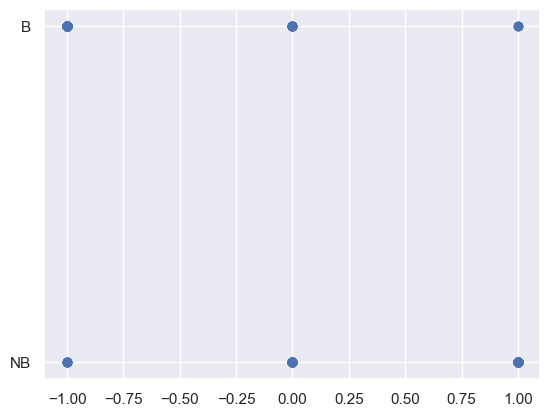

In [6]:
plt.scatter(df['Credibility'], df['Class'])

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x = df.drop(columns=['Class'])
y = df['Class']

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [7]:
from sklearn.naive_bayes import GaussianNB

In [8]:
gnb = GaussianNB()

In [12]:
gnb.fit(x_train, y_train)

GaussianNB()

In [13]:
gnb.score(x_train, y_train)

0.975

In [14]:
from sklearn.metrics import accuracy_score

In [15]:
y_pred = gnb.predict(x_test)

y_pred

array(['NB', 'NB', 'NB', 'NB', 'NB', 'B', 'B', 'B', 'NB', 'NB', 'B', 'B',
       'B', 'B', 'NB', 'B', 'B', 'NB', 'B', 'NB', 'B', 'NB', 'NB', 'NB',
       'B', 'NB', 'NB', 'NB', 'NB', 'NB', 'B', 'NB', 'NB', 'B', 'NB',
       'NB', 'NB', 'B', 'B', 'B', 'NB', 'NB', 'NB', 'B', 'B', 'NB', 'B',
       'NB', 'B', 'NB'], dtype='<U2')

In [16]:
accuracy_score(y_test, y_pred)

1.0

# USING LOGISTIC REGRESSION

In [17]:
df['Class'] = df['Class'].map({'NB': 1, 'B': 0})

df

,Industrial Risk,Management Risk,Financial Flexibility,Credibility,Competitiveness,Operating Risk,Class
0,1,1,0,0,0,1,1
1,-1,-1,0,0,0,-1,1
2,0,0,0,0,0,0,1
3,1,1,1,1,1,1,1
4,-1,-1,1,1,1,-1,1
...,...,...,...,...,...,...,...
245,-1,-1,0,-1,-1,-1,0
246,1,-1,-1,-1,-1,-1,0
247,0,-1,-1,-1,-1,-1,0
248,-1,-1,-1,-1,-1,-1,0


In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
log = LogisticRegression()

In [20]:
log.fit(x_train, y_train)

LogisticRegression()

In [21]:
log.score(x_train, y_train)

0.995

In [22]:
log.intercept_

array([2.11173684])

In [23]:
log.coef_

array([[0.36371365, 0.5061562 , 1.66568878, 1.560887  , 2.9514195 ,
        0.16504812]])

In [25]:
weights = pd.DataFrame(columns=['field', 'weight'])

weights['field'] = x.columns
weights['weight'] = log.coef_[0]

weights

,field,weight
0,Industrial Risk,0.363714
1,Management Risk,0.506156
2,Financial Flexibility,1.665689
3,Credibility,1.560887
4,Competitiveness,2.951419
5,Operating Risk,0.165048


In [26]:
y_pred = log.predict(x_test)

y_pred

array(['NB', 'NB', 'NB', 'NB', 'NB', 'B', 'B', 'B', 'NB', 'NB', 'B', 'B',
       'B', 'B', 'NB', 'B', 'B', 'NB', 'B', 'NB', 'B', 'NB', 'NB', 'NB',
       'B', 'NB', 'NB', 'NB', 'NB', 'NB', 'B', 'NB', 'NB', 'B', 'NB',
       'NB', 'NB', 'B', 'B', 'B', 'NB', 'NB', 'NB', 'B', 'B', 'NB', 'B',
       'NB', 'B', 'NB'], dtype=object)

In [27]:
accuracy_score(y_test, y_pred)

1.0